# Testing for Differences

Objective: We are interested in if two sets of numbers are different, or perhaps one set of numbers is larger than the other.

In [1]:
import pandas
auto = pandas.read_csv('../Datasets/auto-mpg.csv')
auto.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
304,37.3,4,91.0,69,2130,14.7,79,2,fiat strada custom
272,23.8,4,151.0,85,2855,17.6,78,1,oldsmobile starfire sx
142,26.0,4,79.0,67,1963,15.5,74,2,volkswagen dasher
160,17.0,6,231.0,110,3907,21.0,75,1,buick century
89,15.0,8,318.0,150,3777,12.5,73,1,dodge coronet custom


---
### Exercises
* Is the distribution of "mpg" normal?  Explain.  If it isn't mathematically normal, explain why.
* What is the central tendency of mpg and cylinder?


#PID:8
**Question: Is the distribution of "mpg" normal? Explain. If it isn't mathematically normal, explain why.**


We will look at 3 things: (i) the shapiro test, (ii) the distribution of mpg, and the theoretical distribution with same mean & std, (iii) the qq plot.

First, the shapiro test returns the probability of observing the mpg data, assuming that it is normally distributed.  The p-value is less than 0.05 or even 0.01.  This means the hypothesis that mpg is normally distributed is unlikely to be true.

```python
from scipy.stats import shapiro
test_statistics, test_pvalue = shapiro(auto['mpg'])
print(round(test_pvalue, 4))
```

Second, to comparte the observed distribution of mpg to the theoretically normal distribution, we'll construct the theoretical distribution and visualize both.  The sample distribution leans toward the right; it's not symmetric.  Although, the mean somewhat captures the central tendency of the distribution.

```python
from seaborn import displot
displot(data=auto, x='mpg', kind='kde', height=2)
displot(x=theoretical, kind='kde', height=2)
```

Third, the qq plot shows that the sample and theoretical curves do not align very well at the tails.

```python
from statsmodels.api import qqplot
qqplot(auto['mpg'], line='s')
```

In [16]:
from scipy.stats import shapiro
test_statistics, test_pvalue = shapiro(auto['mpg'])
print(test_pvalue)

1.1833407853600875e-07


In [17]:
from numpy.random import normal
theoretical = normal(auto['mpg'].mean(), auto['mpg'].std(), 500)

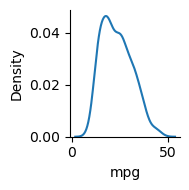

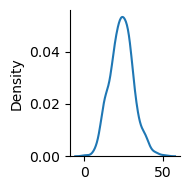

In [23]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from seaborn import displot
displot(data=auto, x='mpg', kind='kde', height=2)
displot(x=theoretical, kind='kde', height=2)

plt.show()

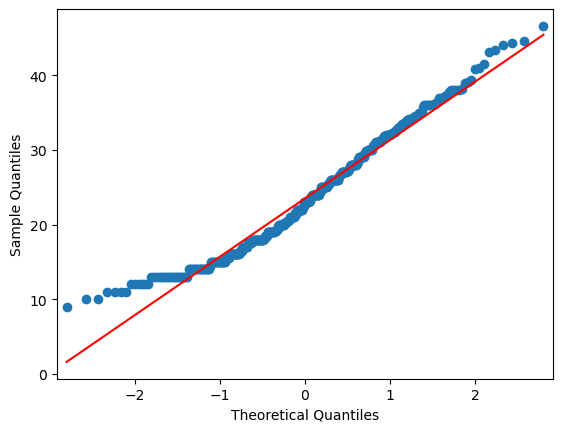

In [5]:
from statsmodels.api import qqplot
qqplot(auto['mpg'], line='s')

---
## Central tendency


**Question: What is the central tendency of mpg?**

Answer: in 
y cases, the average captures the central tendency.  In this case, the average mpg is about 23.5.

```python
auto['mpg'].mean()
```

**Question: What is the central tendency of cylinder?**

Answer: the central tendency of cylinder is 5.455. We don't many 5-cylinder cars. This doesn't capturet the central tendency. Median (of 4) is better. But I think, the mode captures it better.
Looking at the mode, we see that 4 cylinders occur around 51%.
```python
auto['cylinders'].value_counts(1)
```

In [6]:
import numpy
from seaborn import displot

salaries = numpy.random.normal(100000, 10000, 100)
salaries = numpy.append(salaries, [200000,250000,750000,5000000,1000000])
displot(salaries, kind='kde', height=2)
numpy.mean(salaries), numpy.median(salaries)

(164277.83662877962, 102018.28866030938)

When we have outliers, medians can describe or capture the central tendency better.

---

## Understanding p-values

The p-value: the probability of observing the data, suppose that the test hypothesis is true.

1. **Low p-value**: the test hypothesis is unlikely true.
   
2. **High p-value**: the evidence is not strong enough to reject the test hypothesis.
  

---
## Testing for Significant Differences

Observations/data from two populations should be independently collected.

* T-test
    + Hypothesis: The means of two populations are equal.
    + Assumption: Data is normally distributed.
* Mann-Whitney U test:
    + Hypothesis: Given $x$ and $y$ randomly selected from two populations, $P(x>y) = P(y>x)$.
    + Assumption: Shapes of distributions should be similar.
    

Use these:

```python
from scipy.stats import ttest_ind, mannwhitneyu
```


---

In [7]:
from scipy.stats import ttest_ind, mannwhitneyu


import pandas
cars = pandas.read_csv('../Datasets/auto-mpg.csv')
cars.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
196,24.5,4,98.0,60,2164,22.1,76,1,chevrolet woody
148,26.0,4,116.0,75,2246,14.0,74,2,fiat 124 tc
168,23.0,4,140.0,83,2639,17.0,75,1,ford pinto
154,15.0,6,250.0,72,3432,21.0,75,1,mercury monarch
51,30.0,4,79.0,70,2074,19.5,71,2,peugeot 304


**Question**: cars in which region are more economical?

In [8]:
cars.groupby('origin')['mpg'].mean()

origin
1    20.083534
2    27.891429
3    30.450633
Name: mpg, dtype: float64

Statement: based on this comparison, cars in origin 3 are most economical.

Critiques of this statement:
* This statement compares the mean.  This is properly, only if the distributions are normal.
* Even if the distributions are normal, the difference might not be statistically significant.

---

### Exercise

* Investigate if there is a significant difference in "mpg" between cars of origin 2 and origin 3.


In [9]:
from seaborn import relplot, displot, catplot

In [10]:
displot(data=auto, x='mpg', kind='kde', height=2, hue='origin')

In [11]:
origin2 = auto.iloc[auto.groupby('origin').groups[2]]['mpg']
origin3 = auto.iloc[auto.groupby('origin').groups[3]]['mpg']
auto.groupby('origin')['mpg'].mean()

origin
1    20.083534
2    27.891429
3    30.450633
Name: mpg, dtype: float64

In [12]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

mannwhitneyu(origin2, origin3)

MannwhitneyuResult(statistic=2027.0, pvalue=0.005010500309130046)

### Summary

To see if two populations are signficantly different:
* Test to see if they are normal.  If so, use a t-test (ttest_ind) to see if their means are different.
* If they are not normal, use the Mann-Whitney U test to see if their random samples have equal chance of being larger or smaller than each other.

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
import pandas, seaborn
iris = pandas.read_csv('../Datasets/iris.csv')

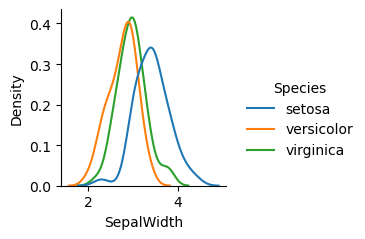

In [24]:
seaborn.displot(data=iris, x='SepalWidth', kind='kde', hue='Species', height=2.5)
plt.show()